### Алгоритм проверки статистических гипотез: <br>
1. Проверяю Шапиро-Уилка + рисую гистограммы (если расческа, то не показываю её в отчете <br>

2. <b>2 варианта развития событий </b>
* а. Ненормальное распределение (хотя бы в 1 из выборок)
        ** a. Применяю Манна-Уитни
        ** b. Тест Муда (n > 300)
* б. Нормальное распределение
        a. Выборки парные
        b. Выборки независимые (делаю тест Флигнера)
                1. Дисперсии равны, то в ttest_ind указываю "var = equal"
                2. Дисперсии не равны, то не указываю

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
os.chdir("C:/Users/danil/Desktop/Саморазвитие/ГПН/Labs/Statistical hypothesis/Lab_4")

### Задача 1
Данные находятся в папке Nursing Home Data<br>
Описание переменных
* BED = число коек в больнице [number of beds in home]
* MCDAYS = annual medical in-patient days (hundreds) 
* TDAYS = annual total patient days (hundreds) 
* PCREV = получено от пациентов за год ( в сотнях долларов) [annual total patient care revenue]
* NSAL = годовой оклад медсестры (в сотнях долларов) annual nursing salaries
* FEXP = расходы больницы за год (сотни долларов)  [annual facilities expenditures]
* RURAL = код типа больницы: загородная (код 1) или городская (код 0) [rural (1) and non-rural (0) homes]<br>

Сравнить показатели для больниц расположенных за городом и в городе.<br>
* Вариант 1 годовой оклад медсестры (в сотнях долларов) [annual nursing salaries] 
* Вариант 2 расходы больницы за год (сотни долларов) [annual facilities expenditures]

#### Вариант 1
H0 - годовой оклад медсестер, работающих в городе и загородом существенно не отличается <br>
H1 - годовой оклад медсестер, работающих в городе и загородом отличается

In [3]:
df = pd.read_csv("Nursing Home Data_data.csv", sep = ";")
df[:5]

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [4]:
a = df.loc[df['RURAL'] == 1]['NSAL']
a[:5]  # загородные больницы

1    2459
5    3622
6    4406
7    4173
9    3224
Name: NSAL, dtype: int64

(array([2., 9., 2., 4., 4., 4., 4., 1., 2., 2.]),
 array([1288. , 1765.1, 2242.2, 2719.3, 3196.4, 3673.5, 4150.6, 4627.7,
        5104.8, 5581.9, 6059. ]),
 <BarContainer object of 10 artists>)

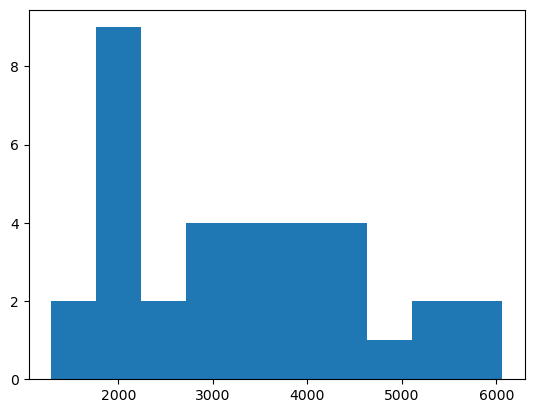

In [5]:
plt.hist(a)
# гистограмма не даёт понимания: распределения является нормальным или нет

In [6]:
print(f"p-value: {stats.shapiro(a)[1]}")
# p-value близко к пороговому значению, но превышает его. Значит, принимаем, что распределение нормальное

p-value: 0.07178342342376709


(array([2., 0., 5., 5., 3., 3., 4., 7., 2., 3.]),
 array([3.10991586, 3.17716437, 3.24441288, 3.31166139, 3.3789099 ,
        3.44615841, 3.51340692, 3.58065543, 3.64790393, 3.71515244,
        3.78240095]),
 <BarContainer object of 10 artists>)

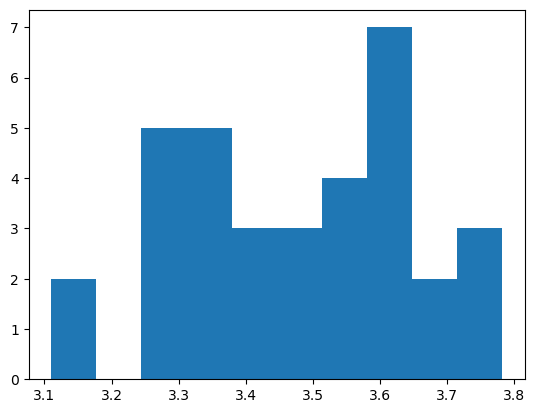

In [7]:
plt.hist(np.log10(a), bins = 10)
# пробую логарифмирование для себя, нормальность распрелеления была доказана выше

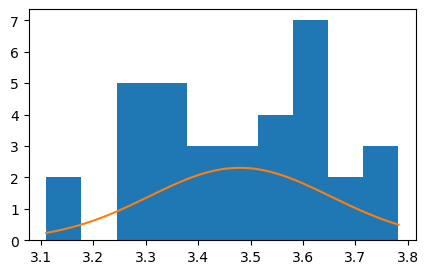

In [8]:
# для себя пробую построить гистограмму и нормальное распределение одновременно
plt.figure(figsize=(5,3))
x = np.log10(a)
y = np.linspace(np.min(x), np.max(x), 300)  # возвращает равномерно распределенные числа на определенном интервале
plt.hist(x)
plt.plot(y, stats.norm.pdf(y, np.mean(x), np.std(x)))  # stats.norm.pdf строит нормальное распределение функции плотности распределения

In [9]:
b = df.loc[df['RURAL'] == 0]['NSAL']
b[:5]

0    5230
2    6304
3    6590
4    5362
8    1955
Name: NSAL, dtype: int64

In [12]:
print(f"p-value: {stats.shapiro(b)[1]}")
# не отвергаем гипотезу о нормальности распределения

p-value: 0.26658865809440613


In [13]:
# выборки независимые, поэтому делаю тест флигнера
print(f"p-value: {stats.fligner(a,b)[1]}")
# не отвергаем гипотезу о равенстве дисперсий для двух независимых выборок (т.к. каждое значение - уникальный объект(штат))

p-value: 0.05254860862708049


In [14]:
print(f"p-value: {stats.ttest_ind(a,b, equal_var = True)[1]}")  # T-критерий для независимых выборок, 
# equal_var = True, тк дисперсии выборок не отличаются статистически
# меньше порогового значения, отвергаем нулевую гипотезу о равенстве средних

p-value: 0.0005409523097389856


In [15]:
g,h,j = 'загородом', 'город', 'Годовой оклад, тыс.$'
def two_hist(x,y):
# функция строит 2 гистограммы с указанием среднего
    plt.figure(figsize = (5,3))
    x.hist(alpha = 0.7, weights=[1/len(x)]*len(x))  
    # alpha - настройка прозрачности
    # weights - на вертикальной оси указываются веса, а не количество раз, когда встречалось то или иное значение 
    y.hist(alpha = 0.7, weights=[1/len(y)]*len(y))
    plt.axvline(np.mean(x), alpha = 0.7, linestyle = 'dashed', color = 'blue', label = g)
    plt.axvline(np.mean(y), alpha = 1, linestyle = 'dashed', color = 'red', label = h)
    plt.legend()
    plt.xlabel(j)

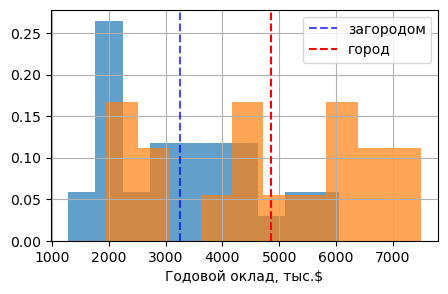

In [16]:
two_hist(a,b)

In [17]:
c, d, e, f, v = 'RURAL', 'NSAL', 'годового оклада медсестер', 'Годовой оклад, тыс.$', 'Где проживает'
def two_boxes(x):
# функция строит два boxplot     
    plt.figure(figsize = (5,3))
    sns.boxplot(data = df, x = c, y = d)
    plt.title('Графики boxplot ' + e)
    plt.xlabel(v)
    plt.ylabel(f)

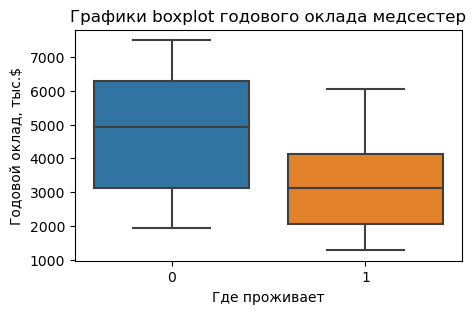

In [18]:
two_boxes(df)

0 - город
1 - загород
#### Вывод
Основную гипотезу отвергаем. Годовой оклад медсестры за городом ниже, чем у медсестры, которая работает в городе

#### Вариант 2
H0 - расходы больниц, находящихся за городом и в городе, не отличаются существенно<br>
Н1 - расходы больниц, находящихся за городом и в городе, различимы

In [19]:
df[:5]

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [20]:
a = df[df['RURAL'] == 1]['FEXP']
b = df[df['RURAL'] == 0]['FEXP']

In [21]:
print(f"a: p-value: {stats.shapiro(a)[1]}")
print(f"b: p-value: {stats.shapiro(b)[1]}")
# распределение обоих выборок ненормальное. Используем медианы и критерий Манна-Уитни (наблюдений < 3000)

a: p-value: 0.040178123861551285
b: p-value: 0.003969298675656319


In [22]:
g,h,j = 'загородом', 'город', 'Расходы больниц в год, сотни $'
k,l = 4000, 6
def two_hists(x,y):
# функция строит 2 гистограммы с указанием медианы
    plt.figure(figsize=(5,4))
    x.hist(alpha = 0.7)
    y.hist(alpha = 0.7)
    plt.axvline(np.median(x), linestyle = 'dashed', color = 'blue', label = g)
    plt.axvline(np.median(y), linestyle = 'dashed', color = 'red', label = h)
    plt.legend()
    plt.text(k, l, f"p-value = {round(stats.mannwhitneyu(x,y)[1], 4)}")
    plt.xlabel(j)

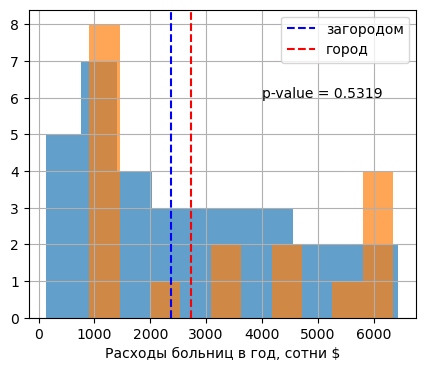

In [23]:
two_hists(a,b)
# p-value больше 0.05, значит, основную гипотезу не отвергаем

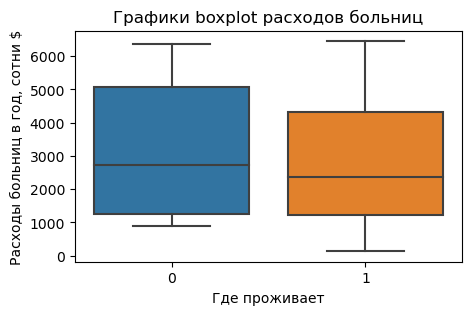

In [25]:
c,d,e,f, v = 'RURAL', 'FEXP', 'расходов больниц', 'Расходы больниц в год, сотни $', 'Где проживает'
two_boxes(df)
# визуально отличия действительно значительно не отличаются

0 - город
1 - загород
#### Вывод
Основную гипотезу не отвергаем, то есть расходы больниц, располагающихся загородом и в городе, статистически значимо не отличаются

### Задача 2
Данные находятся в папке Unions and State Labor Law<br>
Сравнить процент муниципальных служащих, состоящих в профсоюзах в 1982 в разных штатах США. Сравниваются штаты, <br>
отличающиеся по тому, принят ли в этих штатах соответствующий закон (код 1) или не принят (код 0)<br>
* Вариант 1: сравниваются штаты, в которых закон State bargaining laws (право вести коллективные переговоры и вступать в профсоюзы) распространяется на муниципальных служащих, и те, в которых закон на них не распространяется.<br>
* Вариант 2: сравниваются штаты, в которых принят закон State right-to-work law (возможность трудоустройства без вступления в профсоюз) и те, в которых закон не принят.

* DENS - процент муниципальных служащих
* COMP - право вести коллективные переговоры и вступать в профсоюзы.
* RTW - возможность трудоустройства без вступления в профсоюз
* PVT - сотрудники частных компаний

In [26]:
df = pd.read_csv("Unions and State Labor Law_data.csv", sep = ";")
df[:5]

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


#### Вариант 1
* Н0 - в среднем процент муниципальных служащих в штатах, где принят State bargaining laws или не принят, значительно не отличается
* Н1 - ... отличаются статистически  значимо

In [29]:
a = df[df['COMP'] == 1]['DENS']
b = df[df['COMP'] == 0]['DENS']

In [31]:
print(f"a_p-value = {round(stats.shapiro(a)[1], 4)}")
print(f"b_p-value = {round(stats.shapiro(b)[1], 4)}")
# обе выборки распределены нормально

a_p-value = 0.7401
b_p-value = 0.9433


In [33]:
# выборки независимые, поэтому делаю тест флигнера
print(f"p-value = {round(stats.fligner(a,b)[1], 4)}")
# дисперсии отличаются значительно, поэтому добавлю аргумент equal_var = False

p-value = 0.0023


In [34]:
print(f"p-value: {stats.ttest_ind(a,b, equal_var = False)[1]}")  # T-критерий для независимых выборок, 
# equal_var = False, тк дисперсии выборок отличаются статистически
# меньше порогового значения, отвергаем нулевую гипотезу о равенстве средних

p-value: 0.0005628173082035911


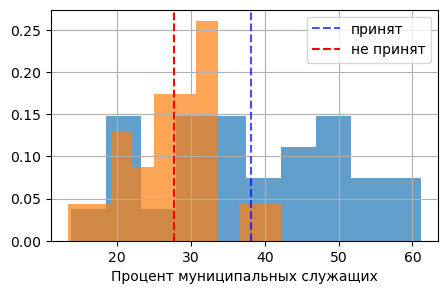

In [35]:
g,h,j, k, l = 'принят', 'не принят', 'Процент муниципальных служащих', 45, 4.7
two_hist(a,b)

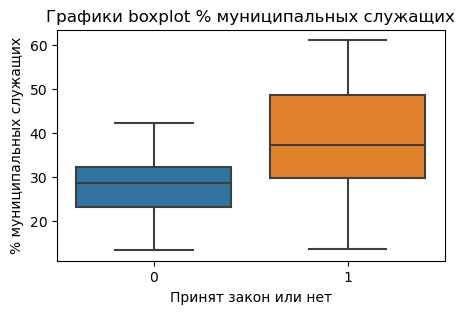

In [257]:
c,d,e, f, v = 'COMP', 'DENS', '% муниципальных служащих', '% муниципальных служащих', 'Принят закон или нет'
two_boxes(df)

0 - не принят<br>
1 - принят 
#### Вывод
Основную гипотезу отвергаем. В среднем, в штатах, где принят State bargaining laws % муниципальных служащих, отличается от тех, где он не принят, на статистически значимую величину.

#### Вариант 2
Вариант 2: сравниваются штаты, в которых принят закон State right-to-work law (возможность трудоустройства без вступления в профсоюз) и те, в которых закон не принят.

In [36]:
df[:5]

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [39]:
a = df[df['RTW'] == 1]['DENS']
b = df[df['RTW'] == 0]['DENS']

In [40]:
print(f"a_p-value = {round(stats.shapiro(a)[1], 4)}")
print(f"b_p-value = {round(stats.shapiro(b)[1], 4)}")
# обе выборки распределены нормально

a_p-value = 0.6464
b_p-value = 0.1917


In [41]:
# так как выборки независимые делаю тест Флигнера
print(f"p-value = {round(stats.fligner(a,b)[1], 4)}")
# дисперсии статистически не отличаются, equal_var = True

p-value = 0.1257


Text(45, 0.19, 'p-value = 0.0001')

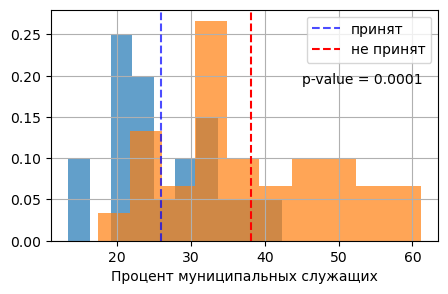

In [42]:
two_hist(a,b)
t = f"p-value = {round(stats.ttest_ind(a,b, equal_var = True)[1], 4)}"
plt.text(45, 0.19, t)

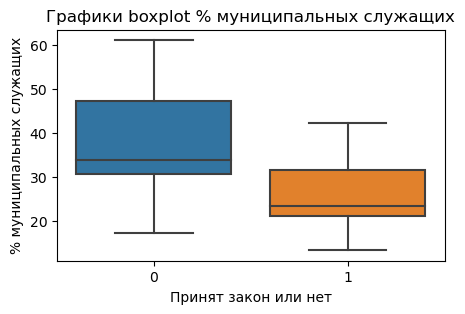

In [43]:
c,d,e, f, v = 'RTW', 'DENS', '% муниципальных служащих', '% муниципальных служащих', 'Принят закон или нет'
two_boxes(df)
# на boxplot указана медиана в середине ящика, поэтому не совпадает с гистограммой

### Вывод
Основную гипотезу отвергаем. Процент муниципальных служащих в штатах, где принят State right-to-work law, и тех штатах, где он не принят, значительно отличается.